# 

In [1]:
import numpy as np 
import pandas as pd
import nltk; nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/taoxiyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data = pd.read_csv('/Users/taoxiyan/Downloads/job_classification/fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


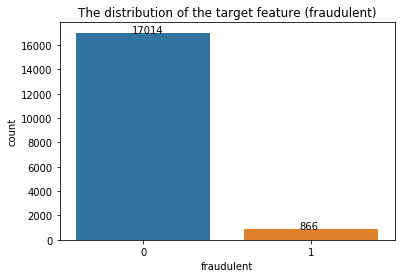

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(data.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

plt.show()

# generate train&test

In [4]:
import random
a = [0]*len(data['job_id'])
data['label']=a
ran_t = random.sample(range(0,len(data['job_id'])),len(data['job_id'])//10)
print(len(ran_t))
for i in ran_t:
    data['label'][i]=1
else:
    data['label'][i]=0
data.head()

1788


/Users/taoxiyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/taoxiyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,label
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


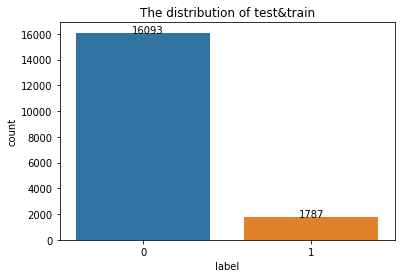

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(data.label)
plt.title('The distribution of test&train')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

plt.show()

# divide 2 part f/t

In [6]:
data_f = pd.DataFrame(data)
data_t = pd.DataFrame(data)

In [7]:
from tqdm import tqdm

for i in tqdm(range(data_f.index.max())):
    if data_f.loc[i,'fraudulent']==0:
        data_f.drop([i],inplace=True)

100%|██████████| 17879/17879 [00:26<00:00, 678.55it/s] 


In [8]:
from tqdm import tqdm

for i in tqdm(range(data_t.index.max())):
    if data_t.loc[i,'fraudulent']==1:
        data_t.drop([i],inplace=True)

100%|██████████| 17879/17879 [00:02<00:00, 6582.96it/s] 


In [9]:
data_t.to_csv("/Users/taoxiyan/Downloads/job_classification/real_data.csv")

In [10]:
data_f.to_csv("/Users/taoxiyan/Downloads/job_classification/fraudulent_data.csv")

# concate 2 f/t part

In [4]:
#10 times
import pandas as pd
data1=pd.read_csv('/Users/taoxiyan/Downloads/job_classification/real_data.csv')
data2=pd.read_csv('/Users/taoxiyan/Downloads/job_classification/text10_new.csv')
res=pd.concat([data1,data2],axis=0)
res.set_index('job_id', inplace=True)
res.to_csv("/Users/taoxiyan/Downloads/job_classification/balanced_data_10.csv")

In [5]:
#17 times
import pandas as pd
data1=pd.read_csv('/Users/taoxiyan/Downloads/job_classification/real_data.csv')
data2=pd.read_csv('/Users/taoxiyan/Downloads/job_classification/text17_new.csv')
res=pd.concat([data1,data2],axis=0)
res.set_index('job_id', inplace=True)
res.to_csv("/Users/taoxiyan/Downloads/job_classification/balanced_data_17.csv")

# divide 2 part train/test(10)

In [6]:
import numpy as np 
import pandas as pd
data = pd.read_csv('/Users/taoxiyan/Downloads/job_classification/balanced_data_10.csv')

In [7]:
train = pd.DataFrame(data)
realt = pd.DataFrame(data)
train.head()

,job_id,Unnamed: 0,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,label
0,1,0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1
2,3,2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1
3,4,3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [8]:
from tqdm import tqdm
import numpy as np 
import pandas as pd

# train = pd.DataFrame(data)

for i in tqdm(range(train.index.max())):
    if train.loc[i,'label']==0:
        train.drop([i],inplace=True)

100%|██████████| 25683/25683 [00:57<00:00, 445.65it/s] 


In [9]:
print(len(train))

2652


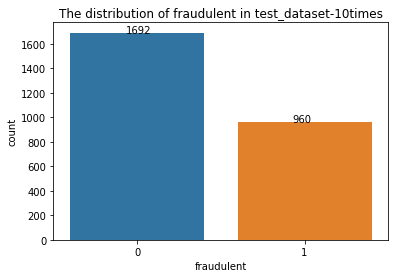

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(train.fraudulent)
plt.title('The distribution of fraudulent in test_dataset-10times')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

plt.show()

In [11]:
train.to_csv("/Users/taoxiyan/Downloads/job_classification/10_test.csv")

In [12]:
from tqdm import tqdm
import numpy as np 
import pandas as pd

# train = pd.DataFrame(data)

for i in tqdm(range(realt.index.max())):
    if realt.loc[i,'label']==1:
        realt.drop([i],inplace=True)
print(len(realt))

100%|██████████| 25683/25683 [00:12<00:00, 2006.85it/s]

23033


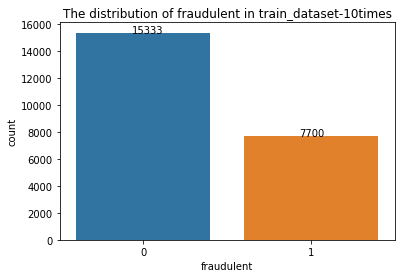

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(realt.fraudulent)
plt.title('The distribution of fraudulent in train_dataset-10times')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

plt.show()

In [14]:
realt.to_csv("/Users/taoxiyan/Downloads/job_classification/10_train.csv")

In [1]:
import numpy as np 
import pandas as pd
data = pd.read_csv('/Users/taoxiyan/Downloads/job_classification/balanced_data_17.csv')

In [2]:
train = pd.DataFrame(data)
realt = pd.DataFrame(data)
train.head()

,job_id,Unnamed: 0,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,label
0,1,0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1
2,3,2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1
3,4,3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [3]:
from tqdm import tqdm
import numpy as np 
import pandas as pd

# train = pd.DataFrame(data)

for i in tqdm(range(train.index.max())):
    if train.loc[i,'label']==0:
        train.drop([i],inplace=True)
print(len(train))

100%|██████████| 31752/31752 [01:41<00:00, 312.25it/s] 

3324


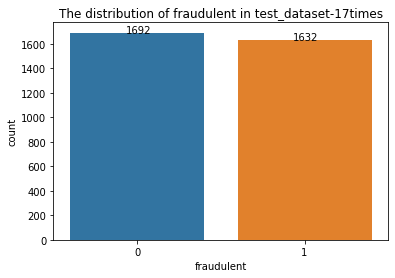

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(train.fraudulent)
plt.title('The distribution of fraudulent in test_dataset-17times')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

plt.show()

In [5]:
train.to_csv("/Users/taoxiyan/Downloads/job_classification/17_test.csv")

In [6]:
from tqdm import tqdm
import numpy as np 
import pandas as pd

# train = pd.DataFrame(data)

for i in tqdm(range(realt.index.max())):
    if realt.loc[i,'label']==1:
        realt.drop([i],inplace=True)
print(len(realt))

100%|██████████| 31752/31752 [00:23<00:00, 1340.04it/s]

28430


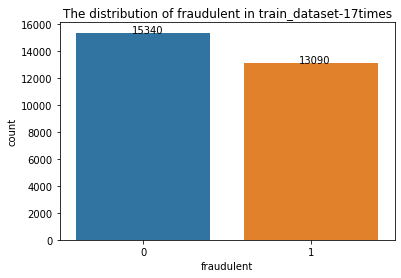

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(realt.fraudulent)
plt.title('The distribution of fraudulent in train_dataset-17times')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

plt.show()

In [8]:
realt.to_csv("/Users/taoxiyan/Downloads/job_classification/17_train.csv")

# bert data cleaning

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install transformers
!pip install tensorflow==2.1.0
!pip install simpletransformers
!pip install tokenizers==0.8.1.rc1
# !export CUDA_HOME=/usr/local/cuda-10.1
# !git clone https://github.com/NVIDIA/apex
# %cd apex
!pip install -v --no-cache-dir ./
# import logging

# logging.basicConfig(level=logging.INFO)
# transformers_logger = logging.getLogger("transformers")
# transformers_logger.setLevel(logging.WARNING)

import pandas as pd

Non-user install because site-packages writeable
Created temporary directory: /private/var/folders/07/5gyybmls1nj9nlqcsrv7r80c0000gn/T/pip-ephem-wheel-cache-pfnyr2c1
Created temporary directory: /private/var/folders/07/5gyybmls1nj9nlqcsrv7r80c0000gn/T/pip-req-tracker-m8yzrglm
Initialized build tracking at /private/var/folders/07/5gyybmls1nj9nlqcsrv7r80c0000gn/T/pip-req-tracker-m8yzrglm
Created build tracker: /private/var/folders/07/5gyybmls1nj9nlqcsrv7r80c0000gn/T/pip-req-tracker-m8yzrglm
Entered build tracker: /private/var/folders/07/5gyybmls1nj9nlqcsrv7r80c0000gn/T/pip-req-tracker-m8yzrglm
Created temporary directory: /private/var/folders/07/5gyybmls1nj9nlqcsrv7r80c0000gn/T/pip-install-jj1prl84
Cleaning up...
Removed build tracker: '/private/var/folders/07/5gyybmls1nj9nlqcsrv7r80c0000gn/T/pip-req-tracker-m8yzrglm'
ERROR: Directory './' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
Exception information:
Traceback (most recent call last):
  File "/Users/taoxiyan/o

1 location(s) to search for versions of pip:
* https://pypi.org/simple/pip/
Fetching project page and analyzing links: https://pypi.org/simple/pip/
Getting page https://pypi.org/simple/pip/
Found index url https://pypi.org/simple
Getting credentials from keyring for https://pypi.org/simple
Getting credentials from keyring for pypi.org
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/pip/ HTTP/1.1" 200 14315
  Found link https://files.pythonhosted.org/packages/3d/9d/1e313763bdfb6a48977b65829c6ce2a43eaae29ea2f907c8bbef024a7219/pip-0.2.tar.gz#sha256=88bb8d029e1bf4acd0e04d300104b7440086f94cc1ce1c5c3c31e3293aee1f81 (from https://pypi.org/simple/pip/), version: 0.2
  Found link https://files.pythonhosted.org/packages/18/ad/c0fe6cdfe1643a19ef027c7168572dac6283b80a384ddf21b75b921877da/pip-0.2.1.tar.gz#sha256=83522005c1266cc2de97e65072ff7554ac0f30ad369c3b02ff3a764b962048da (from https://pypi.org/simple/pip/), version: 0.2.1
  Found link https://files.pythonhoste

In [20]:
df = pd.read_csv("/Users/taoxiyan/Downloads/job_classification/balanced_data_17.csv")
# data.set_index('job_id', inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,label
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [21]:
df['text'] = list(df['title'].map(str) + " " + df['department'].map(str) + \
             " " + df['company_profile'].map(str) + " " + \
             df['description'].map(str) + " " + \
             df['requirements'].map(str) + " " +\
             df['benefits'].map(str) + " " +\
             df['employment_type'].map(str) + " " +\
             df['required_experience'].map(str) + " " +\
             df['required_education'].map(str) + " " +\
             df['industry'].map(str)+ " " + df['function'].map(str))

In [22]:
delete_list=['job_id','title','location','telecommuting',
             'has_company_logo','has_questions','department',
             'salary_range','company_profile','description','requirements',
             'benefits','employment_type','required_experience','required_education',
             'industry','function']

In [23]:
for val in delete_list:
    del df[val]
df.head()

,fraudulent,label,text
0,0,0,"Marketing Intern Marketing We're Food52, and w..."
1,0,1,Customer Service - Cloud Video Production Succ...
2,0,1,Commissioning Machinery Assistant (CMA) nan Va...
3,0,0,Account Executive - Washington DC Sales Our pa...
4,0,0,Bill Review Manager nan SpotSource Solutions L...


#datacleaning

In [24]:
import spacy, re
#Data Cleanup
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\r','')
df['text']=df['text'].str.replace('\t','')
  
# #This removes unwanted texts
# df['text'] = df['text'].apply(lambda x: re.sub(r'[0-9]','',str(x)))
# df['text'] = df['text'].apply(lambda x: re.sub(r'[/(){}\[\]\|@,;.:-]',' ',str(x)))
  
# #Converting all upper case to lower case
# df['text']= df['text'].apply(lambda s:s.lower() if type(s) == str else s)
  

#Remove un necessary white space
df['text']=df['text'].str.replace('  ',' ')

# #Remove Stop words
# nlp=spacy.load("en_core_web_sm")
# df['text'] =df['text'].apply(lambda x: ' '.join([str(word) for word in x.split() if nlp.vocab[word].is_stop==False ]))
print("data cleaning successful")

data cleaning successful


In [25]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    url = re.compile(r'url\S+')
    url = re.compile(r'URL\S+')
    return url.sub(r'',str(text))


def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(text))


def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',str(text))


# def remove_punctuation(text):
#     table=str.maketrans('','',string.punctuation)
#     return text.translate(table)

# def decontracted(phrase):
#     # specific
#     phrase = re.sub(r"won't", "will not", phrase)
#     phrase = re.sub(r"can\'t", "can not", phrase)

#     # general
#     phrase = re.sub(r"n\'t", " not", phrase)
#     phrase = re.sub(r"\'re", " are", phrase)
#     phrase = re.sub(r"\'s", " is", phrase)
#     phrase = re.sub(r"\'d", " would", phrase)
#     phrase = re.sub(r"\'ll", " will", phrase)
#     phrase = re.sub(r"\'t", " not", phrase)
#     phrase = re.sub(r"\'ve", " have", phrase)
#     phrase = re.sub(r"\'m", " am", phrase)
#     return phrase

def final_preprocess(text):
    text = text.replace('\\r', ' ')
    text = text.replace('\\"', ' ')
    text = text.replace('\\n', ' ')
#     text = re.sub('[^A-Za-z0-9]+', ' ', text)
#     text = ' '.join(e for e in text.split() if e.lower() not in stopwords)
#     text = text.lower()
#     ps = PorterStemmer()
#     text = ps.stem(text)
    return text

In [26]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+|url\S+|URL\S+')
    return url.sub(r'',str(text))

In [27]:
L = "URLrxasg9f3oih28239 zhengweihua"
L = remove_URL(L)
print(L)

 zhengweihua


In [28]:
df['text']=df['text'].map(remove_URL)
df['text']=df['text'].map(remove_emoji)
df['text']=df['text'].map(remove_html)
df['text']=df['text'].map(final_preprocess)
print(df.iloc[1].at['text'])

Customer Service - Cloud Video Production Success 90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish.  Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Paypal, L’Oreal, Sony and Barclays and has offices in Auckland, London, Sydney, Tokyo and

In [29]:
df.to_csv("/Users/taoxiyan/Downloads/job_classification/cleaning_data_17.csv")